### CMPT 756: Systems for Big Data (Spring 2019) – Assignment 2

#### Consistency, Latency or Quorum Size? A Quantitative Analysis of Tradeoffs in a Distributed Database System Design

Anurag Bejju – abejju@sfu.ca

In [15]:
# Importing quantitative stats of our analysis into a pandas DF
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {"axes.facecolor": ".98"})
#plt.style.use('seaborn-white')
df = pd.read_csv('summary.csv')

### Quorum Size vs Internal Consistency for each Database

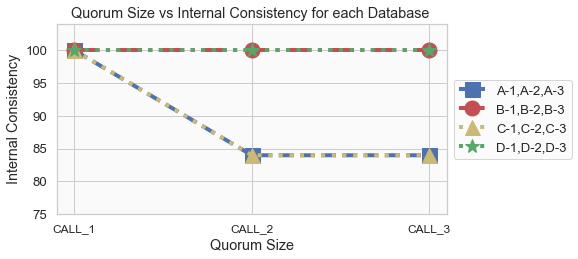

In [11]:

plot_df = df[['database','quorum_size','average_internal_consistency']]
fig, ax = plt.subplots(figsize=(7,3.5))
styles=['bs--', 'ro-.', 'y^:','g*:']
ab = plot_df.groupby(['quorum_size','database']).sum()['average_internal_consistency'].unstack()
y = list(ab.reset_index()['quorum_size'].values)
ab.plot(ax=ax, alpha=1,style=styles, lw=4,ms=15)
plt.title("Quorum Size vs Internal Consistency for each Database ")
plt.xlabel("Quorum Size")
plt.ylabel("Internal Consistency")
plt.xticks([0,1,2], y, fontsize=12)
plt.ylim(75, 104)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('internal_consistency_qourum.png',bbox_inches = "tight", format='png', dpi=750)

### Quorum Size vs External Consistency for each Database

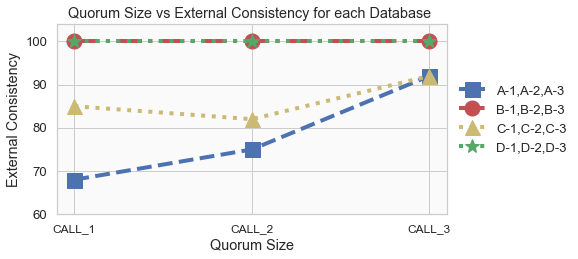

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn-white')
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {"axes.facecolor": ".98"})
plot_df = df[['database','quorum_size','average_external_consistency']]
fig, ax = plt.subplots(figsize=(7,3.5))
styles=['bs--', 'ro-.', 'y^:','g*:']
ab = plot_df.groupby(['quorum_size','database']).sum()['average_external_consistency'].unstack()
y = list(ab.reset_index()['quorum_size'].values)
ab.plot(ax=ax, alpha=1,style=styles, lw=4,ms=15)
plt.title("Quorum Size vs External Consistency for each Database ")
plt.xlabel("Quorum Size")
plt.ylabel("External Consistency")
plt.xticks([0,1,2], y, fontsize=12)
plt.ylim(60, 104)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.savefig('external_consistency_qourum.png',bbox_inches = "tight", format='png', dpi=750)

### Quorum Size vs Average Latency for each Database

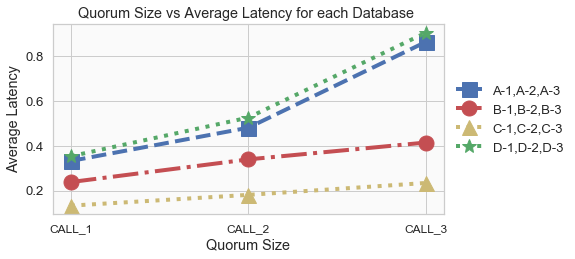

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn-white')
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {"axes.facecolor": ".98"})
plot_df = df[['database','quorum_size','average_latency']]
fig, ax = plt.subplots(figsize=(7,3.5))
styles=['bs--', 'ro-.', 'y^:','g*:']
ab = plot_df.groupby(['quorum_size','database']).sum()['average_latency'].unstack()
y = list(ab.reset_index()['quorum_size'].values)
ab.plot(ax=ax, alpha=1,style=styles, lw=4,ms=15)
plt.title("Quorum Size vs Average Latency for each Database ")
plt.xlabel("Quorum Size")
plt.ylabel("Average Latency")
plt.xticks([0,1,2], y, fontsize=12)
#plt.ylim(60, 104)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.savefig('latency_qourum.png',bbox_inches = "tight", format='png', dpi=750)

### Consistency VS Latency VS Quorum Size

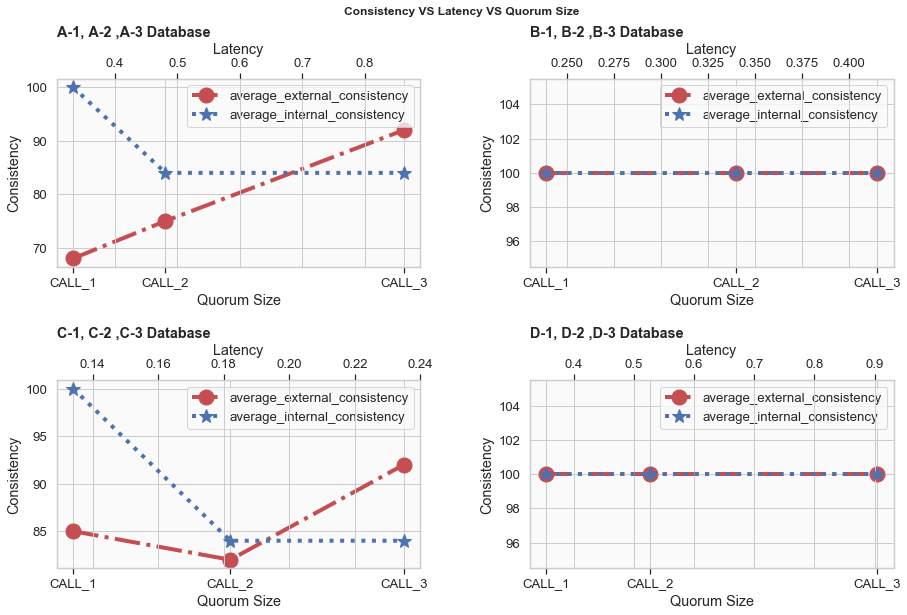

In [16]:
plot_df = df[['database','quorum_size','average_latency','average_internal_consistency','average_external_consistency']]
a = plot_df[plot_df.database == 'A-1,A-2,A-3']
b = plot_df[plot_df.database == 'B-1,B-2,B-3']
c = plot_df[plot_df.database == 'C-1,C-2,C-3']
d = plot_df[plot_df.database == 'D-1,D-2,D-3']
a.head()
styles=['bs--', 'ro-.', 'y^:','b*:']


fig = plt.figure(figsize=(15,10))
fig.suptitle('Consistency VS Latency VS Quorum Size\n\n',fontweight="bold")

p = plt.subplot(2, 2, 1)
newax = p.twiny()
fig.subplots_adjust(bottom=0.20)
lns1 = p.plot( 'average_latency', 'average_external_consistency',styles[1] , data=a, ms=15, linewidth=4)
lns2 = newax.plot( 'average_latency', 'average_internal_consistency',styles[3] , data=a, ms=15, linewidth=4)
p.set_xticks(list(a.average_latency.values))
p.set_xticklabels(list(a.quorum_size.values))
plt.title("A-1, A-2 ,A-3 Database",fontweight="bold",loc='left')
p.set_xlabel('Quorum Size')
newax.set_xlabel('Latency')
p.set_ylabel("Consistency")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
p.legend(lns, labs, loc=1)


p = plt.subplot(2, 2, 2)
newax = p.twiny()
fig.subplots_adjust(bottom=0.20)
lns1 = p.plot( 'average_latency', 'average_external_consistency',styles[1] , data=b, ms=15, linewidth=4)
lns2 = newax.plot( 'average_latency', 'average_internal_consistency',styles[3] , data=b, ms=15, linewidth=4)
p.set_xticks(list(b.average_latency.values))
p.set_xticklabels(list(b.quorum_size.values))
plt.title("B-1, B-2 ,B-3 Database",fontweight="bold",loc='left')
p.set_xlabel('Quorum Size')
newax.set_xlabel('Latency')
p.set_ylabel("Consistency")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
p.legend(lns, labs, loc=0)

p = plt.subplot(2, 2, 3)
newax = p.twiny()
fig.subplots_adjust(bottom=0.20)
lns1 = p.plot( 'average_latency', 'average_external_consistency',styles[1] , data=c, ms=15, linewidth=4)
lns2 = newax.plot( 'average_latency', 'average_internal_consistency',styles[3] , data=c, ms=15, linewidth=4)
p.set_xticks(list(c.average_latency.values))
p.set_xticklabels(list(c.quorum_size.values))
plt.title("C-1, C-2 ,C-3 Database",fontweight="bold",loc='left')
p.set_xlabel('Quorum Size')
newax.set_xlabel('Latency')
p.set_ylabel("Consistency")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
p.legend(lns, labs, loc=0)

p = plt.subplot(2, 2, 4)
newax = p.twiny()
fig.subplots_adjust(bottom=0.20)
lns1 = p.plot( 'average_latency', 'average_external_consistency',styles[1] , data=d, ms=15, linewidth=4)
lns2 = newax.plot( 'average_latency', 'average_internal_consistency',styles[3] , data=d, ms=15, linewidth=4)
p.set_xticks(list(d.average_latency.values))
p.set_xticklabels(list(d.quorum_size.values))
plt.title("D-1, D-2 ,D-3 Database",fontweight="bold",loc='left')
p.set_xlabel('Quorum Size')
newax.set_xlabel('Latency')
p.set_ylabel("Consistency")
lns = lns1+lns2
labs = [l.get_label() for l in lns]
p.legend(lns, labs, loc=0)
plt.subplots_adjust(hspace = 0.6,wspace = 0.3 )
#plt.savefig('consistency_latency_qourum.png', format='png',bbox_inches = "tight", dpi=750)
plt.show()



### Consistency vs Latency

In [11]:
plot_df_con = plot_df.groupby('consistency').mean().reset_index()
plot_df_con

,consistency,average_latency,average_external_consistency,average_internal_consistency,period
0,consistent,0.463000,100.000000,100.000000,10.0
1,inconsistent,0.371333,82.333333,89.333333,10.0


### Overall Analysis

In [12]:
plot_df = df[['database','average_latency', 'average_external_consistency']].sort_values('average_latency')
plot_df = df.groupby('database').mean()
plot_df['consistency'] = ['inconsistent','consistent','inconsistent','consistent']
plot_df['latency'] = ['Ragged','Uniform','Uniform','Ragged']
plot_df

,average_latency,average_external_consistency,average_internal_consistency,period,consistency,latency
database,,,,,,
"A-1,A-2,A-3",0.559000,78.333333,89.333333,10.0,inconsistent,Ragged
"B-1,B-2,B-3",0.331333,100.000000,100.000000,10.0,consistent,Uniform
"C-1,C-2,C-3",0.183667,86.333333,89.333333,10.0,inconsistent,Uniform
"D-1,D-2,D-3",0.594667,100.000000,100.000000,10.0,consistent,Ragged
